# Torchvision Transforms

See what different Torchvision Transforms actually do.

In [22]:
import os
import pathlib
import torchvision.transforms as v2
from torchvision.datasets.imagenette import Imagenette
import matplotlib.pyplot as plt

# Get the path to the Imagenette dataset
path = pathlib.Path(os.getcwd())
data_path = pathlib.Path(path.parents[0], "data")
data_path

PosixPath('/Users/selvino/dl-learning-repo/data')

In [50]:
%matplotlib inline

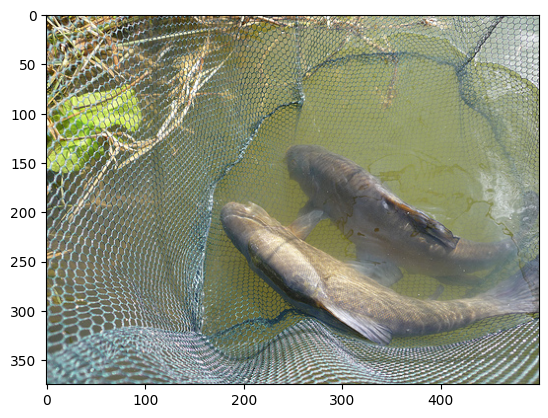

In [16]:
# Preview of what the data looks like
ds = Imagenette(data_path)
# ds[X][1] is the label
plt.imshow(ds[0][0])

## Transforms

Torchvision has image transformation callables. Under the hood they are subclasses of nn.Module.

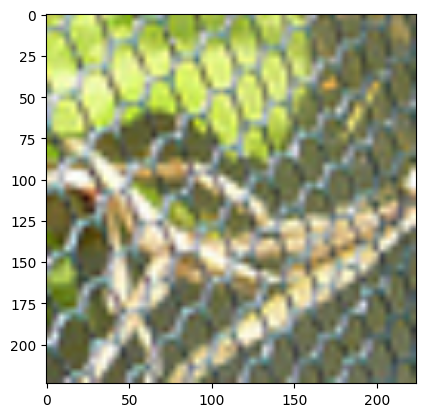

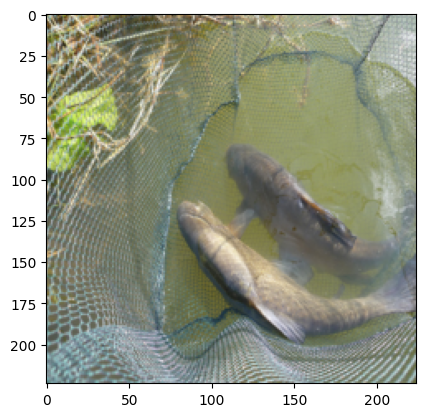

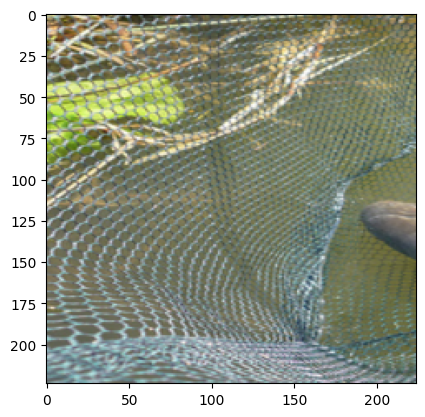

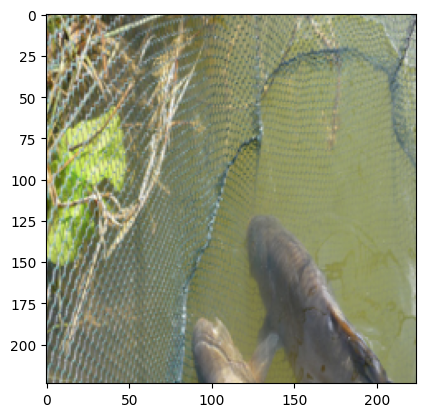

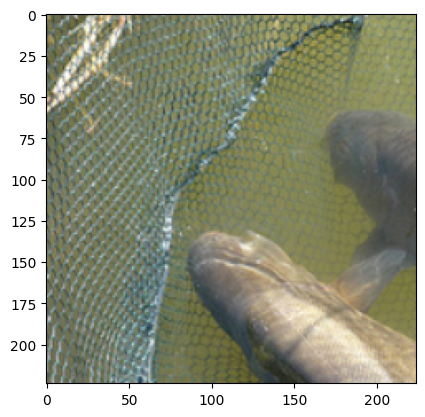

In [62]:
# ResizedRandomCrop
# The scale argument says what proportion of the image area we should consider in our crop
# The ratio argument says what the aspect ratio should be between width and height, and changes what the crop area looks like.
# Finally the crop gets resized to the desired size, so unless aspect ratio and size have the same proportion, it will look distorted
example_args = [
    {
        "scale": (0.01,0.02),
    },
    {
        "scale": (10,11)
    },
    {
        "ratio": (0.25,0.5)
    },
    {
        "ratio": (2,3)
    },
    {
        "ratio": (1,1)
    }
]

for kwargs in example_args:
    transform = v2.RandomResizedCrop(size=(224,224), **kwargs)
    plt.imshow(transform(ds[0][0]))
    plt.show()

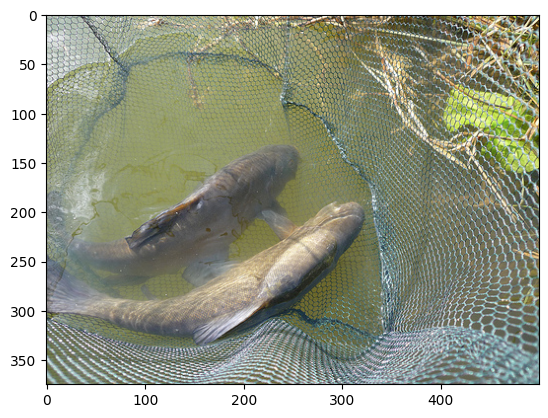

In [66]:
# Horizontal Flip
# Horizontally flips the image with probability p. Helps generalize better.
transform = v2.RandomHorizontalFlip(p=0.9)
plt.imshow(transform(ds[0][0]))

(0.485, 0.456, 0.406)
(0.229, 0.224, 0.225)


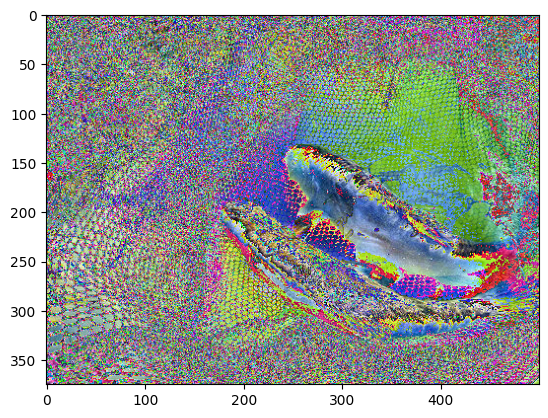

In [72]:
# Normalize images
# Turns every RGB value into a z score based on a channel-specific mean and standard deviation
# Brings all the feature values into a common range to help with the optimization, eg. so gradients don't explode
print(IMAGENET_DEFAULT_MEAN)
print(IMAGENET_DEFAULT_STD)
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
transform = v2.Compose([
    v2.ToTensor(),
    v2.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
    v2.ToPILImage()
])
plt.imshow(transform(ds[0][0]))